In [78]:
# Code snippets from original repo https://github.com/CSAILVision/NetDissect
# doesn't include trick for bigger matrices to account for numerical stability.
#please refer to original repo for that
import numpy
import scipy.linalg
import matplotlib.pyplot as plt
dims=2
powers=numpy.arange(0.1, 1.0 + 1e-15, 0.1)

In [79]:
#Gram-Schmidt decomposition
NR=numpy.random.normal(size=(dims,dims))
Q,R = numpy.linalg.qr(NR)

In [80]:
# make diagonals of R positive and make it lower-right
D=numpy.diagonal(R)
L = numpy.diagflat(D / abs(D))
result = numpy.dot(Q, L)
if numpy.linalg.det(result) < 0:
  result[0]=-result[0]

RR=result

In [81]:
T, W = scipy.linalg.schur(RR, output='real')
# get rotation angle from the diagonal
RA = numpy.arccos(numpy.clip(numpy.diag(T), -1, 1))[0:dims:2]

In [82]:
#sort the colums
biggest_first = numpy.argsort(-numpy.amax(T, axis=1))
cols_seen = set()
permutation = numpy.zeros((dims, dims))
for row in biggest_first:
    biggest_cols = numpy.argsort(-T[row])
    for col in biggest_cols:
        if col not in cols_seen:
            permutation[col,row] = 1
            cols_seen.add(col)
            break

In [83]:
print(permutation)
print(W)
print(T)
print(RA)

[[0. 1.]
 [1. 0.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[-0.44602961  0.8950182 ]
 [-0.8950182  -0.44602961]]
[2.03312064]


In [85]:
results = []
for p in powers:
  A = [a * p for a in RA]
  B = [numpy.cos([[a, a + numpy.pi/2], [a - numpy.pi/2, a]]) for a in A]
  results.append(numpy.dot(permutation,
            numpy.dot(numpy.dot(W, B[0]), W.transpose())))

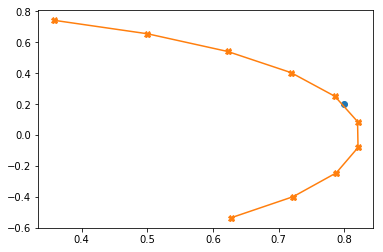

In [87]:
f_x = [0.8,0.2]
result_mat = numpy.zeros((len(powers),dims))
for i, r in enumerate(results):
  result_mat[i]=numpy.dot(r,f_x)

plt.plot(f_x[0],f_x[1], marker='o')
plt.plot(result_mat[:,0],result_mat[:,1], marker='X')
plt.show()